<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 46 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [2]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src

/content/MA574_Portfolio-Valuation-and-Risk-Management/src


In [0]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import csv
import math
from scipy.optimize import curve_fit
Apple = pd.read_csv('AAPL.csv')
GOOG = pd.read_csv('GOOG.csv')
ETF= pd.read_csv('SPDR_S&P_500_ETF.csv')
Begin_Year2_index = 252
end_Years_index = 501

# 1.Using this daily data, calculate the daily log returns for year-1. Build a histogram of these daily returns.


<Figure size 432x288 with 0 Axes>

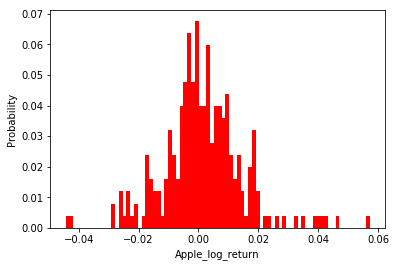

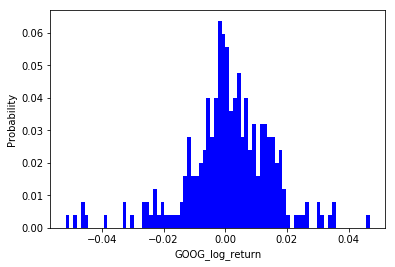

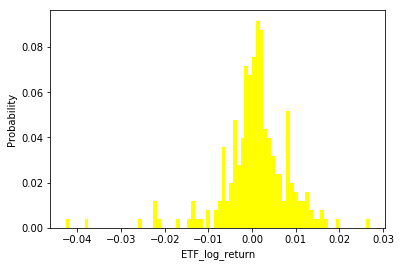

<Figure size 432x288 with 0 Axes>

In [4]:
#Problem 1
Log_return = pd.DataFrame(data = [np.log(Apple['Adj Close'][i]/Apple['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)],columns = ['Apple_log_return'])
Log_return['GOOG_log_return'] = np.array([np.log(GOOG['Adj Close'][i]/GOOG['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)])
Log_return['ETF_log_return'] = np.array([np.log(ETF['Adj Close'][i]/ETF['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)])
counts_Apple, bins_Apple, bars_Apple = plt.hist(Log_return['Apple_log_return'],bins = 80,color = 'red', weights = [1./len(Log_return['Apple_log_return'])]*len(Log_return['Apple_log_return']))
plt.xlabel('Apple_log_return')
plt.ylabel('Probability')
plt.figure()
counts_GOOG, bins_GOOG, bars_GOOG = plt.hist(Log_return['GOOG_log_return'],bins = 80,color = 'blue', weights = [1./len(Log_return['GOOG_log_return'])]*len(Log_return['GOOG_log_return']))
plt.xlabel('GOOG_log_return')
plt.ylabel('Probability')
plt.figure()
counts_ETF, bins_ETF, bars_ETF = plt.hist(Log_return['ETF_log_return'],bins = 80,color = 'yellow', weights = [1./len(Log_return['ETF_log_return'])]*len(Log_return['ETF_log_return']))
plt.xlabel('ETF_log_return')
plt.ylabel('Probability')
plt.figure()

# 2.Fit a normal distribution to your year-1 daily log-returns.

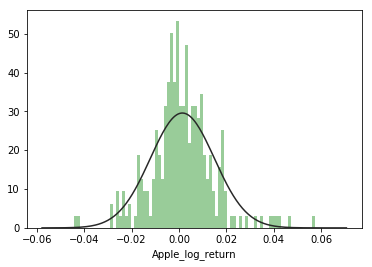

In [5]:
sns.distplot(Log_return['Apple_log_return'],bins = 80,hist = True,kde = False, fit = stats.norm, color = 'g')

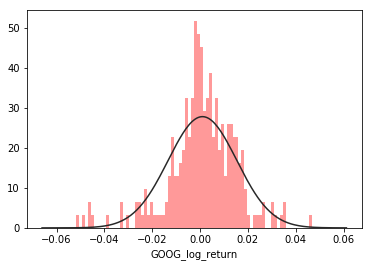

In [6]:
sns.distplot(Log_return['GOOG_log_return'],bins = 80,hist = True,kde = False, fit = stats.norm, color = 'r')

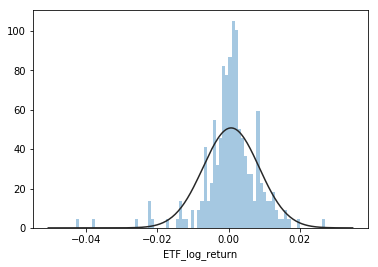

In [7]:
sns.distplot(Log_return['ETF_log_return'],bins = 80,hist = True,kde = False, fit = stats.norm)

# 3.Construct a QQ plot using the CDF of the normal distribution and your year-1 sample data.


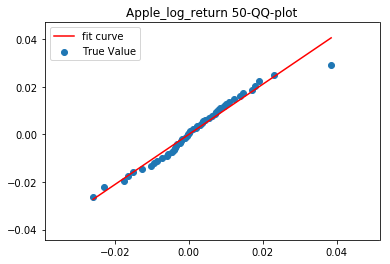

In [37]:
DApp=sorted(Log_return['Apple_log_return'])

q=0.02
n=int(q*(len(DApp)+1))
AppQ=[DApp[i*n] for i in range(1,int(1/q)) ]

Amu=sum(DApp)/len(DApp)
Asigma=math.sqrt(sum([(data-Amu)**2 for data in DApp])/(len(DApp)-1))
FAq=[norm.ppf(i*q,loc=Amu,scale=Asigma) for i in range(1,int(1/q))]

def f_fit(x, k,b):
    return k*x+b

p_fit, prov = curve_fit(f_fit, AppQ,FAq)

plt.scatter(AppQ,FAq,label='True Value')
plt.plot(AppQ,[p_fit[0]*x+p_fit[1] for x in AppQ], color='r', label='fit curve')
plt.title('Apple_log_return 50-QQ-plot')
plt.legend()
plt.show()

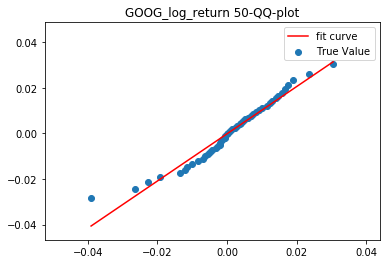

In [38]:
DApp2=sorted(Log_return['GOOG_log_return'])

q=0.02
n=int(q*(len(DApp)+1))
AppQ2=[DApp2[i*n] for i in range(1,int(1/q)) ]

Amu2=sum(DApp2)/len(DApp2)
Asigma2=math.sqrt(sum([(data-Amu2)**2 for data in DApp2])/(len(DApp2)-1))
FAq2=[norm.ppf(i*q,loc=Amu2,scale=Asigma2) for i in range(1,int(1/q))]

def f_fit(x, k,b):
    return k*x+b

p_fit2, prov2 = curve_fit(f_fit, AppQ2,FAq2)

plt.scatter(AppQ2,FAq2,label='True Value')
plt.plot(AppQ2,[p_fit2[0]*x+p_fit2[1] for x in AppQ2], color='r', label='fit curve')
plt.title('GOOG_log_return 50-QQ-plot')
plt.legend()
plt.show()

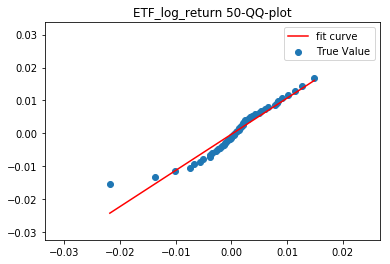

In [39]:
DApp=sorted(Log_return['ETF_log_return'])

q=0.02
n=int(q*(len(DApp)+1))
AppQ=[DApp[i*n] for i in range(1,int(1/q)) ]

Amu=sum(DApp)/len(DApp)
Asigma=math.sqrt(sum([(data-Amu)**2 for data in DApp])/(len(DApp)-1))
FAq=[norm.ppf(i*q,loc=Amu,scale=Asigma) for i in range(1,int(1/q))]

def f_fit(x, k,b):
    return k*x+b

p_fit, prov = curve_fit(f_fit, AppQ,FAq)

plt.scatter(AppQ,FAq,label='True Value')
plt.plot(AppQ,[p_fit[0]*x+p_fit[1] for x in AppQ], color='r', label='fit curve')
plt.title('ETF_log_return 50-QQ-plot')
plt.legend()
plt.show()

# 4. Construct a QQ plot using another distribution of your choice. The distribution should be an appropriate choice to attempt to ﬁt your year-1 data.


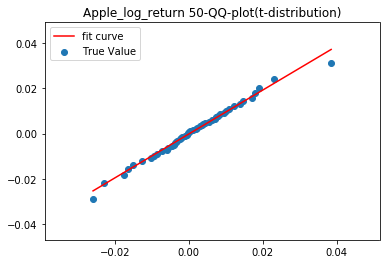

In [45]:
DApp=sorted(Log_return['Apple_log_return'])
q=0.02
n=int(q*(len(DApp)+1))
AppQ=[DApp[i*n] for i in range(1,int(1/q)) ]

##Amu=sum(DApp)/len(DApp)
##Asigma=math.sqrt(sum([(data-Amu)**2 for data in DApp])/(len(DApp)-1))
df,Amu,Asigma=stats.t.fit(DApp)
FAq=[stats.t.ppf(i*q,df,loc=Amu,scale=Asigma) for i in range(1,int(1/q))]

def f_fit(x, k,b):
    return k*x+b

p_fit, prov = curve_fit(f_fit, AppQ,FAq)

plt.scatter(AppQ,FAq,label='True Value')
plt.plot(AppQ,[p_fit[0]*x+p_fit[1] for x in AppQ], color='r', label='fit curve')
plt.title('Apple_log_return 50-QQ-plot(t-distribution)')
plt.legend()
plt.show()

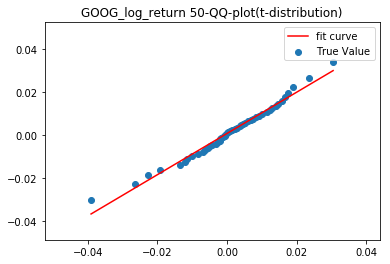

In [46]:
DApp=sorted(Log_return['GOOG_log_return'])
q=0.02
n=int(q*(len(DApp)+1))
AppQ=[DApp[i*n] for i in range(1,int(1/q)) ]

##Amu=sum(DApp)/len(DApp)
##Asigma=math.sqrt(sum([(data-Amu)**2 for data in DApp])/(len(DApp)-1))
df,Amu,Asigma=stats.t.fit(DApp)
FAq=[stats.t.ppf(i*q,df,loc=Amu,scale=Asigma) for i in range(1,int(1/q))]

def f_fit(x, k,b):
    return k*x+b

p_fit, prov = curve_fit(f_fit, AppQ,FAq)

plt.scatter(AppQ,FAq,label='True Value')
plt.plot(AppQ,[p_fit[0]*x+p_fit[1] for x in AppQ], color='r', label='fit curve')
plt.title('GOOG_log_return 50-QQ-plot(t-distribution)')
plt.legend()
plt.show()

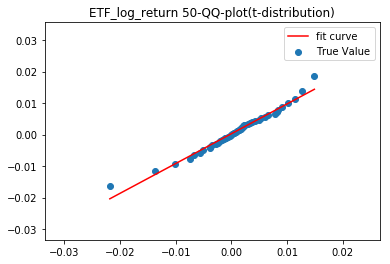

In [47]:
DApp=sorted(Log_return['ETF_log_return'])
q=0.02
n=int(q*(len(DApp)+1))
AppQ=[DApp[i*n] for i in range(1,int(1/q)) ]

##Amu=sum(DApp)/len(DApp)
##Asigma=math.sqrt(sum([(data-Amu)**2 for data in DApp])/(len(DApp)-1))
df,Amu,Asigma=stats.t.fit(DApp)
FAq=[stats.t.ppf(i*q,df,loc=Amu,scale=Asigma) for i in range(1,int(1/q))]

def f_fit(x, k,b):
    return k*x+b

p_fit, prov = curve_fit(f_fit, AppQ,FAq)

plt.scatter(AppQ,FAq,label='True Value')
plt.plot(AppQ,[p_fit[0]*x+p_fit[1] for x in AppQ], color='r', label='fit curve')
plt.title('ETF_log_return 50-QQ-plot(t-distribution)')
plt.legend()
plt.show()

# 5.Construct boxplots for the year-1 data sets 

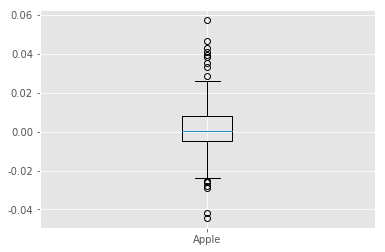

In [50]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif']=['SimHei']
df=pd.DataFrame()
DApp=sorted(Log_return['Apple_log_return'])
df['Apple']=DApp
plt.boxplot(x=df.values,labels=df.columns)
plt.show()

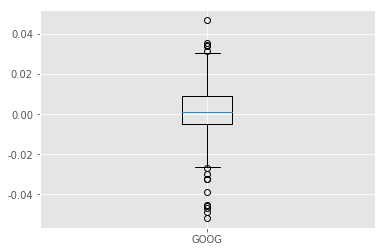

In [51]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif']=['SimHei']
df=pd.DataFrame()
DApp=sorted(Log_return['GOOG_log_return'])
df['GOOG']=DApp
plt.boxplot(x=df.values,labels=df.columns)
plt.show()

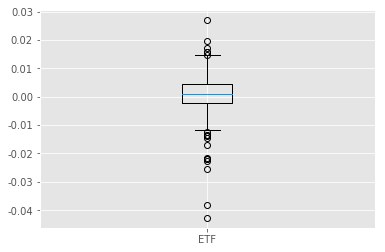

In [52]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif']=['SimHei']
df=pd.DataFrame()
DApp=sorted(Log_return['ETF_log_return'])
df['ETF']=DApp
plt.boxplot(x=df.values,labels=df.columns)
plt.show()

# 6. Calculate the sample skewness and sample kurtosis3 for the year-1 daily returns.

In [54]:
DApp=sorted(Log_return['Apple_log_return'])

Amu=sum(DApp)/len(DApp)
Asigma=math.sqrt(sum([(data-Amu)**2 for data in DApp])/(len(DApp)-1))

Ske=sum([(1/len(DApp))*(data-Amu)**3/(Asigma**3) for data in DApp])
Kurt=sum([(1/len(DApp))*(data-Amu)**4/(Asigma**4) for data in DApp])
print('Apple log return Skewness=%f,kurtosis=%f'%(Ske,Kurt))



Apple log return Skewness=0.382522,kurtosis=5.266686


In [57]:
DApp=sorted(Log_return['GOOG_log_return'])

Amu=sum(DApp)/len(DApp)
Asigma=math.sqrt(sum([(data-Amu)**2 for data in DApp])/(len(DApp)-1))

Ske=sum([(1/len(DApp))*(data-Amu)**3/(Asigma**3) for data in DApp])
Kurt=sum([(1/len(DApp))*(data-Amu)**4/(Asigma**4) for data in DApp])
print('GOOG log return Skewness=%f,kurtosis=%f'%(Ske,Kurt))

GOOG log return Skewness=-0.642923,kurtosis=5.054134


In [58]:
DApp=sorted(Log_return['ETF_log_return'])

Amu=sum(DApp)/len(DApp)
Asigma=math.sqrt(sum([(data-Amu)**2 for data in DApp])/(len(DApp)-1))

Ske=sum([(1/len(DApp))*(data-Amu)**3/(Asigma**3) for data in DApp])
Kurt=sum([(1/len(DApp))*(data-Amu)**4/(Asigma**4) for data in DApp])
print('ETF log return Skewness=%f,kurtosis=%f'%(Ske,Kurt))

ETF log return Skewness=-1.358593,kurtosis=9.332299


# 7. For each asset, what does your ﬁtted model say about the probability of the year-1 most extreme 3 outliers?

In [63]:
DApp=sorted(Log_return['Apple_log_return'])
df,mu,sigma=stats.t.fit(DApp)
p=1-stats.t.cdf(DApp[-3],df=df,loc= mu, scale=sigma)
print('The probability of most extreme 3 outliers for apple log return less then {:.2%}'.format(p))

The probability of most extreme 3 outliers for apple log return less then 0.73%


In [64]:
DApp=sorted(Log_return['GOOG_log_return'])
df,mu,sigma=stats.t.fit(DApp)
p=1-stats.t.cdf(DApp[-3],df=df,loc= mu, scale=sigma)
print('The probability of most extreme 3 outliers for apple log return less then {:.2%}'.format(p))

The probability of most extreme 3 outliers for apple log return less then 1.87%


In [65]:
DApp=sorted(Log_return['ETF_log_return'])
df,mu,sigma=stats.t.fit(DApp)
p=1-stats.t.cdf(DApp[-3],df=df,loc= mu, scale=sigma)
print('The probability of most extreme 3 outliers for apple log return less then {:.2%}'.format(p))

The probability of most extreme 3 outliers for apple log return less then 2.41%


# 8. Use all of the above to argue whether or not it is reasonable to assume that each of your year-1 log returns samples come from a normal distribution and your other distribution of choice. Use an appropriate hypothesis test to support your argument.


- Firstly, we use Kolmogorov-Smirnov test to test if this samples come from a normal distribution or not. we choose the $\alpha = 0.05$

In [9]:
stats.norm.fit(Log_return['Apple_log_return']) #fit Apple log return to norm-distribution

(0.00142565791208483, 0.013485239197559874)

In [8]:
kstest(Log_return['Apple_log_return'], 'norm',(0.00142565791208483, 0.013485239197559874,))

KstestResult(statistic=0.07406149688512817, pvalue=0.12114913491120463)

pvalue > $\alpha$, so we cannot reject the hypothesis that the Apple log return came from the normal distribution at $\alpha = 0.05$

In [10]:
stats.norm.fit(Log_return['GOOG_log_return']) #fit GOOG log return to norm-distribution

(0.0010121799346079724, 0.014369178495478523)

In [0]:
kstest(Log_return['GOOG_log_return'], 'norm',(0.0010121799346079724, 0.014369178495478523,))

KstestResult(statistic=0.09692579194369585, pvalue=0.01668202441116732)

pvalue <  α , so we reject the hypothesis that the GOOG log return came from the normal distribution at  α=0.05

In [0]:
stats.norm.fit(Log_return['ETF_log_return'])

(0.0007258024037359578, 0.007858031038307288)

In [0]:
kstest(Log_return['ETF_log_return'], 'norm',(0.0007258024037359578, 0.007858031038307288,))

KstestResult(statistic=0.11880318824456795, pvalue=0.0015219427448299621)

pvalue <  α , so we reject the hypothesis that the ETF log return came from the normal distribution at  α=0.05

- Secondly, we use Kolmogorov-Smirnov test to test if this samples come from a t-distribution or not. we choose the $\alpha = 0.05$

In [0]:
stats.t.fit(Log_return['Apple_log_return']) #fit Apple log return to t-distribution

(3.555111449512162, 0.0010963014930051983, 0.009468477910042364)

In [0]:
kstest(Log_return['Apple_log_return'],'t',(3.555111449512162, 0.0010963014930051983, 0.009468477910042364,))

KstestResult(statistic=0.034139501069563205, pvalue=0.9316875659375338)

pvalue >  α , so we cannot reject the hypothesis that the Apple log return came from the normal distribution at  α=0.05

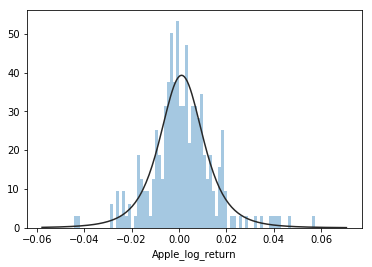

In [16]:
sns.distplot(Log_return['Apple_log_return'],bins = 80,hist = True,kde = False, fit = stats.t)

In [0]:
stats.t.fit(Log_return['GOOG_log_return']) #fit GOOG log return to t-distribution

(3.47643118831203, 0.0018083727431770778, 0.010020753758218828)

In [17]:
kstest(Log_return['GOOG_log_return'],'t',(3.47643118831203, 0.0018083727431770778, 0.010020753758218828,))

KstestResult(statistic=0.040817189564636314, pvalue=0.7971573995223605)

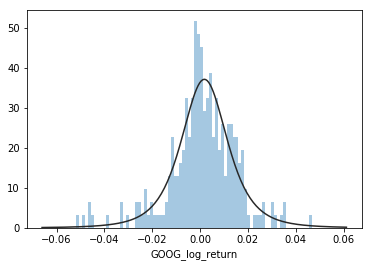

In [18]:
sns.distplot(Log_return['GOOG_log_return'],bins = 80,hist = True,kde = False, fit = stats.t)

pvalue >  α , so we cannot reject the hypothesis that the Apple log return came from the normal distribution at  α=0.05

In [0]:
stats.t.fit(Log_return['ETF_log_return']) #fit GOOG log return to t-distribution

(2.4950504819151447, 0.0011057246408057303, 0.004434521942797269)

In [19]:
kstest(Log_return['ETF_log_return'],'t',(2.4950504819151447, 0.0011057246408057303, 0.004434521942797269,))

KstestResult(statistic=0.047734406465812396, pvalue=0.6174897795329576)

pvalue >  α , so we cannot reject the hypothesis that the Apple log return came from the normal distribution at  α=0.05

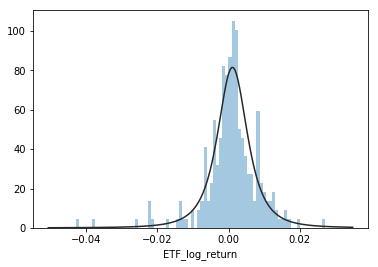

In [20]:
sns.distplot(Log_return['ETF_log_return'],bins = 80,hist = True,kde = False, fit = stats.t)

# 9.Suppose you use your models ﬁtted to year-1 data for risk management for year-2. How does your model perform? How do the ﬁtted parameters change? Does your year-1 data based model handle year-2 outliers reasonably? Use techniques from parts 1-8 on year-2 data to support your argument.


In [0]:
Log_return2 = pd.DataFrame(data = [np.log(Apple['Adj Close'][i]/Apple['Adj Close'][i-1]) for i in range(Begin_Year2_index, end_Years_index)],columns = ['Apple_log_return2'])
Log_return2['GOOG_log_return2'] = np.array([np.log(GOOG['Adj Close'][i]/GOOG['Adj Close'][i-1]) for i in range(Begin_Year2_index, end_Years_index)])
Log_return2['ETF_log_return2'] = np.array([np.log(ETF['Adj Close'][i]/ETF['Adj Close'][i-1]) for i in range(Begin_Year2_index, end_Years_index)])

First year fitted parameters: mu= 0.00142566 and sigma= 0.0134852
Second year fitted parameters: mu= -0.000298937 and sigma= 0.0203879


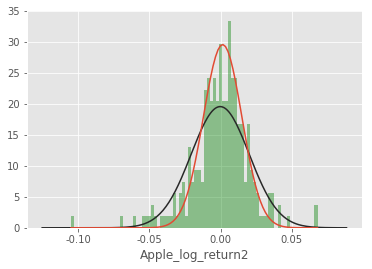

In [92]:
mu1,sigma1 = stats.norm.fit(Log_return['Apple_log_return'])
mu2,sigma2 = stats.norm.fit(Log_return2['Apple_log_return2'])
xmin = min(Log_return2['Apple_log_return2'])
xmax = max(Log_return2['Apple_log_return2'])
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu1,sigma1)
sns.distplot(Log_return2['Apple_log_return2'],bins = 80,hist = True,kde = False, fit = stats.norm, color = 'g')
plt.plot(x,p,label = 'the first year best fit(norm)')
#the orange line is the best fit for the first year's data using norm distribution
print('First year fitted parameters: mu= {:.6} and sigma= {:.6}'.format(mu1,sigma1))
print('Second year fitted parameters: mu= {:.6} and sigma= {:.6}'.format(mu2,sigma2))

First year fitted parameters: df = 3.55511 and mu= 0.0010963 and sigma= 0.00946848
Second year fitted parameters: df = 3.53034 and mu= 0.000900583 and sigma= 0.0141107


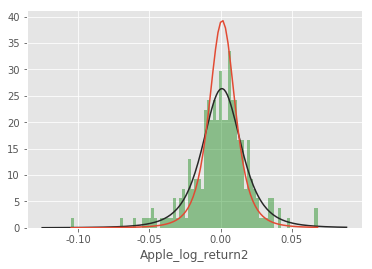

In [96]:
df,mu1,sigma1 = stats.t.fit(Log_return['Apple_log_return'])
df2,mu2,sigma2 = stats.t.fit(Log_return2['Apple_log_return2'])
xmin = min(Log_return2['Apple_log_return2'])
xmax = max(Log_return2['Apple_log_return2'])
x = np.linspace(xmin,xmax,100)
p = stats.t.pdf(x,df,mu1,sigma1)
sns.distplot(Log_return2['Apple_log_return2'],bins = 80,hist = True,kde = False, fit = stats.t, color = 'g')
plt.plot(x,p,label = 'the first year best fit(t)')
#the orange line is the best fit for the first year's data using t distribution
print('First year fitted parameters: df = {:.6} and mu= {:.6} and sigma= {:.6}'.format(df,mu1,sigma1))
print('Second year fitted parameters: df = {:.6} and mu= {:.6} and sigma= {:.6}'.format(df2,mu2,sigma2))

First year fitted parameters: mu= 0.00101218 and sigma= 0.0143692
Second year fitted parameters: mu= -2.99721e-05 and sigma= 0.0184386


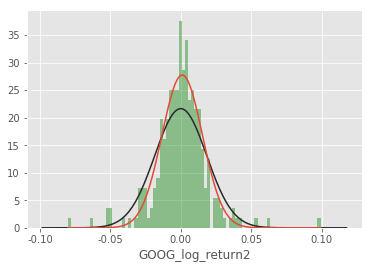

In [93]:
mu1,sigma1 = stats.norm.fit(Log_return['GOOG_log_return'])
mu2,sigma2 = stats.norm.fit(Log_return2['GOOG_log_return2'])
xmin = min(Log_return2['GOOG_log_return2'])
xmax = max(Log_return2['GOOG_log_return2'])
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu1,sigma1)
sns.distplot(Log_return2['GOOG_log_return2'],bins = 80,hist = True,kde = False, fit = stats.norm, color = 'g')
plt.plot(x,p,label = 'the first year best fit(norm)')
#the orange line is the best fit for the first year's data using norm distribution
print('First year fitted parameters: mu= {:.6} and sigma= {:.6}'.format(mu1,sigma1))
print('Second year fitted parameters: mu= {:.6} and sigma= {:.6}'.format(mu2,sigma2))

First year fitted parameters: mu= 0.000725802 and sigma= 0.00785803
Second year fitted parameters: mu= 0.000115078 and sigma= 0.0104963


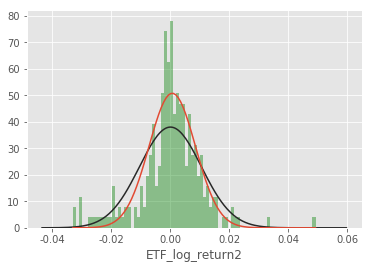

In [94]:
mu1,sigma1 = stats.norm.fit(Log_return['ETF_log_return'])
mu2,sigma2 = stats.norm.fit(Log_return2['ETF_log_return2'])
xmin = min(Log_return2['ETF_log_return2'])
xmax = max(Log_return2['ETF_log_return2'])
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu1,sigma1)
sns.distplot(Log_return2['ETF_log_return2'],bins = 80,hist = True,kde = False, fit = stats.norm, color = 'g')
plt.plot(x,p,label = 'the first year best fit(norm)')
#the orange line is the best fit for the first year's data using norm distribution
print('First year fitted parameters: mu= {:.6} and sigma= {:.6}'.format(mu1,sigma1))
print('Second year fitted parameters: mu= {:.6} and sigma= {:.6}'.format(mu2,sigma2))

- Obvious, if we use norm distribution fit the first year's data, 